<a href="https://colab.research.google.com/github/allandevbr92/MyResume/blob/master/analiseEnem2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ENEM 2022**

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Enem2022/MICRODADOS_ENEM_2022.csv', encoding='ISO-8859-1', delimiter=';')

#Nota Média Por Disciplina - Masculino X Feminino





<ipython-input-67-61933f5f65cd>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  media_notas_por_disciplina_sexo = df.groupby('TP_SEXO')['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT'].mean()


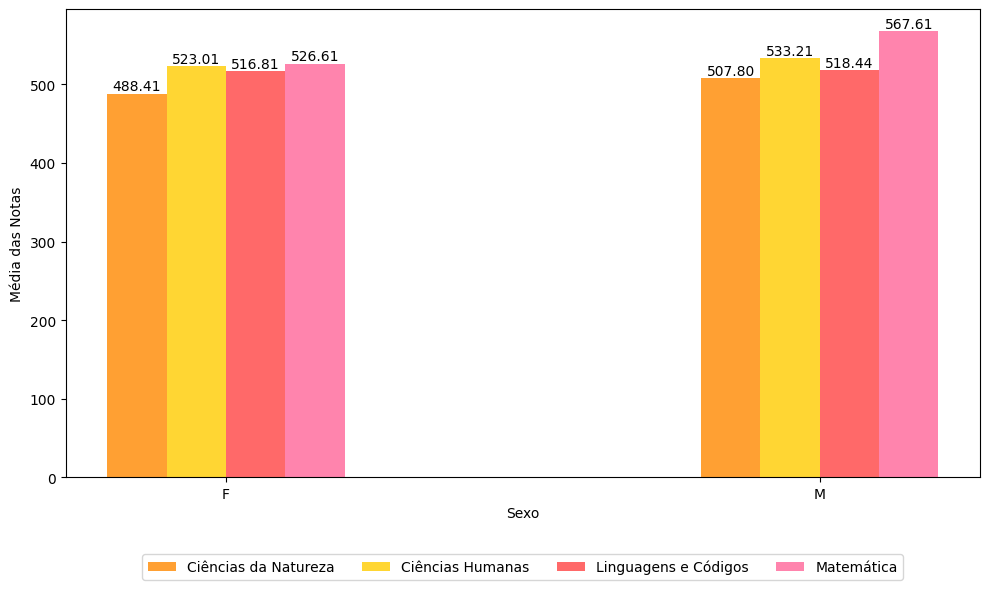

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculando a média das notas por sexo para cada disciplina
media_notas_por_disciplina_sexo = df.groupby('TP_SEXO')['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT'].mean()

# Convertendo os valores dos sexos para strings
media_notas_por_disciplina_sexo.index = media_notas_por_disciplina_sexo.index.astype(str)

# Configurando os dados para o gráfico
disciplinas = ['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática']
sexos = media_notas_por_disciplina_sexo.index
medias = media_notas_por_disciplina_sexo.values

# Aumentando o tamanho da figura
fig, ax = plt.subplots(figsize=(10, 6))

# Criando o gráfico de colunas
bar_width = 0.1
opacity = 0.8
colors = ['#FF8800', '#FFCC00', '#FF4444', '#FF6699']  # Cores para as disciplinas

for i, disciplina in enumerate(disciplinas):
    ax.bar([x + i * bar_width for x in range(len(sexos))], medias[:, i], bar_width, alpha=opacity, color=colors[i], label=disciplina)

# Configurando os rótulos dos eixos x e y
ax.set_xlabel('Sexo')
ax.set_ylabel('Média das Notas')
ax.set_xticks([x + (bar_width * (len(disciplinas) - 1) / 2) for x in range(len(sexos))])
ax.set_xticklabels(sexos)

# Adicionando os valores das médias nas colunas
for i, disciplina in enumerate(disciplinas):
    for j, media in enumerate(medias[:, i]):
        ax.annotate(f"{media:.2f}", (j + i * bar_width, media), ha='center', va='bottom')

# Posicionando a legenda abaixo do gráfico
ax.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=len(disciplinas))

# Exibindo o gráfico
plt.tight_layout()
plt.show()


#Nota Media Redação e Disciplinas - Masculino X Feminino

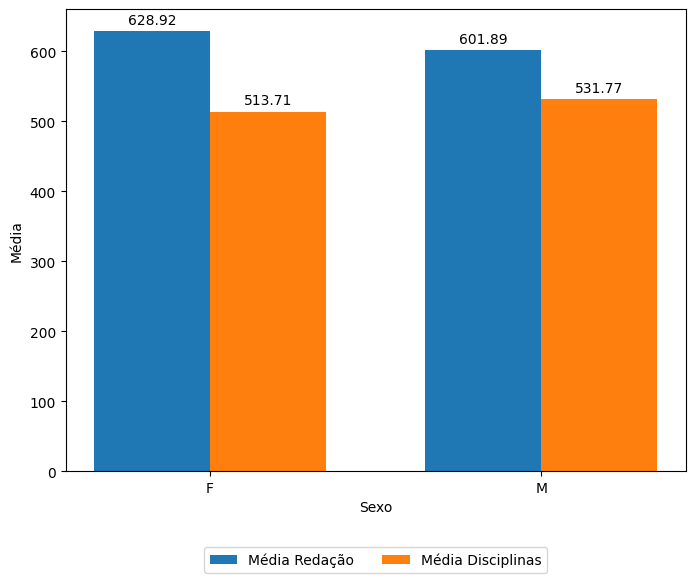

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que você já tenha carregado os dados em um dataframe chamado 'df'

# Calculando as médias de redação e médias gerais por sexo
media_redacao = df.groupby('TP_SEXO')['NU_NOTA_REDACAO'].mean()
media_disciplinas = df.groupby('TP_SEXO')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].mean().mean(axis=1)

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(8, 6))
x = range(len(media_redacao))
bar_width = 0.35

# Médias de Redação
rects1 = ax.bar(x, media_redacao, bar_width, label='Média Redação')
# Médias Gerais
rects2 = ax.bar([i + bar_width for i in x], media_disciplinas, bar_width, label='Média Disciplinas')

# Definindo os rótulos dos eixos x e y
ax.set_xlabel('Sexo')
ax.set_ylabel('Média')
ax.set_xticks([i + bar_width/2 for i in x])
ax.set_xticklabels(media_redacao.index)

# Adicionando os valores das médias nas colunas
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3),
                    textcoords="offset points", ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

# Posicionando a legenda abaixo do gráfico
ax.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=len(disciplinas))

# Exibindo o gráfico
plt.show()




# Nota Média Geral - Masculino X Feminino


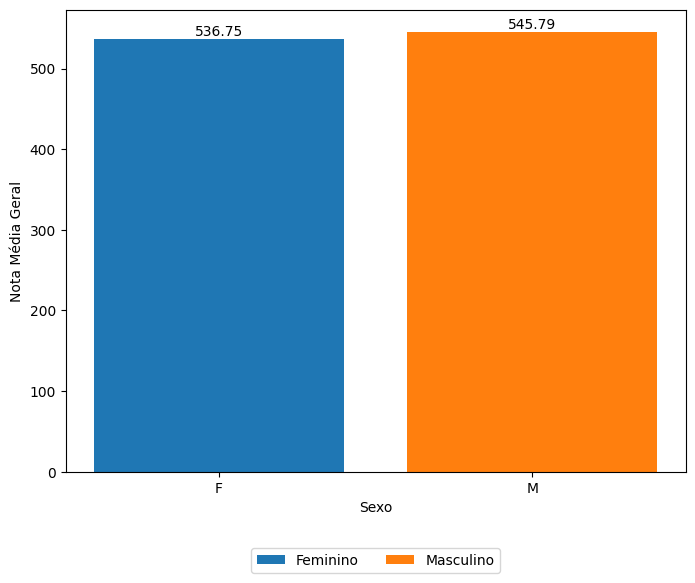

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Supondo que você já tenha carregado os dados em um dataframe chamado 'df'

# Calculando as médias de redação e médias gerais por sexo
media_geral = df.groupby('TP_SEXO')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean().mean(axis=1)

# Criando o gráfico de barras empilhadas
fig, ax = plt.subplots(figsize=(8, 6))

# Definindo as cores para cada disciplina
cores = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

# Convertendo as médias para uma matriz numpy
medias = np.array([media_geral['F'], media_geral['M']])

# Plotando as barras empilhadas para cada disciplina
barras = ax.bar(media_geral.index, medias, label=['Feminino', 'Masculino'], color=cores)

# Adicionando rótulos nas barras
for i, barra in enumerate(barras):
    height = barra.get_height()
    ax.text(barra.get_x() + barra.get_width() / 2, height,
            f"{height:.2f}", ha='center', va='bottom')

# Definindo os rótulos dos eixos x e y
ax.set_xlabel('Sexo')
ax.set_ylabel('Nota Média Geral')

# Adicionando uma legenda

ax.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=len(disciplinas))

# Exibindo o gráfico
plt.show()


#Nota Média Redação X Tipo de Escola

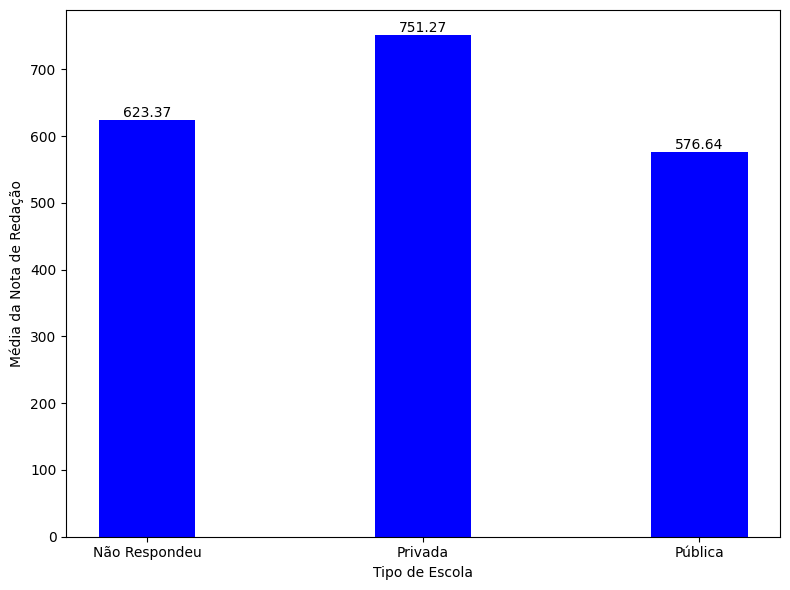

In [75]:
import matplotlib.pyplot as plt
import numpy as np

# Calculando a média da nota de redação por tipo de escola
media_redacao_por_escola = df.groupby('TP_ESCOLA')['NU_NOTA_REDACAO'].mean()

# Configurando os dados para o gráfico
escolas = media_redacao_por_escola.index
medias = media_redacao_por_escola.values

# Aumentando o tamanho da figura
fig, ax = plt.subplots(figsize=(8, 6))

# Criando o gráfico de colunas
bar_width = 0.35

rects = ax.bar(escolas, medias, bar_width, color='blue')

# Configurando os rótulos dos eixos x e y
ax.set_xlabel('Tipo de Escola')
ax.set_ylabel('Média da Nota de Redação')

# Adicionando os valores das médias nas colunas
for i, media in enumerate(medias):
    ax.annotate(f"{media:.2f}", (escolas[i], media), ha='center', va='bottom')

# Configurando a cor das colunas não preenchidas
for rect in rects:
    height = rect.get_height()
    if np.isnan(height):
        rect.set_color('red')

# Exibindo o gráfico
plt.tight_layout()
plt.show()





#Nota Média Disciplinas (exceto Redação) X Tipo de Escola

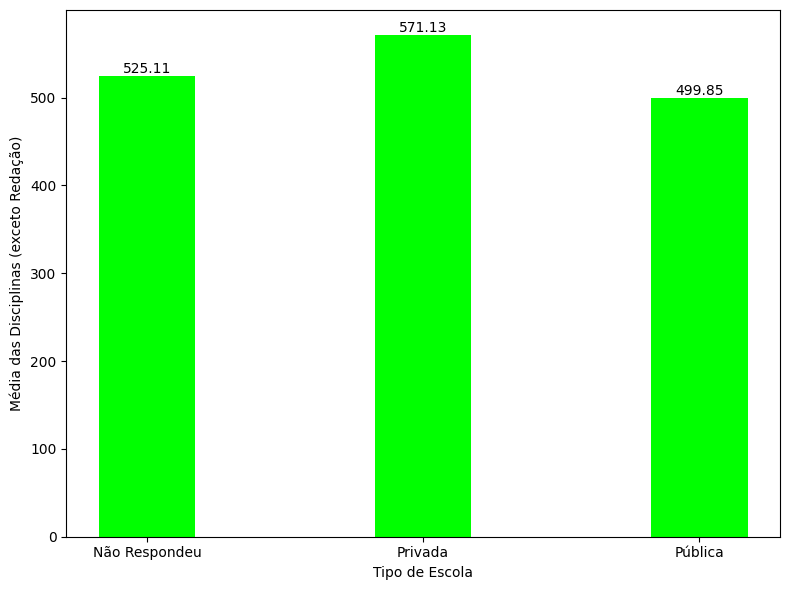

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Calculando a média das disciplinas sem a redação por tipo de escola
media_disciplinas_por_escola = df.groupby('TP_ESCOLA')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].mean().mean(axis=1)

# Configurando os dados para o gráfico
escolas = media_disciplinas_por_escola.index
medias = media_disciplinas_por_escola.values

# Definindo o mapa de cores em degradê
cmap = mcolors.LinearSegmentedColormap.from_list('my_cmap', ['#FF0000', '#00FF00'])

# Aumentando o tamanho da figura
fig, ax = plt.subplots(figsize=(8, 6))

# Criando o gráfico de colunas
bar_width = 0.35

rects = ax.bar(escolas, medias, bar_width, color=cmap(medias))

# Configurando os rótulos dos eixos x e y
ax.set_xlabel('Tipo de Escola')
ax.set_ylabel('Média das Disciplinas (exceto Redação)')

# Adicionando os valores das médias nas colunas
for i, media in enumerate(medias):
    ax.annotate(f"{media:.2f}", (escolas[i], media), ha='center', va='bottom')

# Exibindo o gráfico
plt.tight_layout()
plt.show()


#Média das Notas por Disciplina e Tipo de Escola

<ipython-input-42-91cd1a3f95e3>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  media_notas_por_disciplina_escola = df.groupby('TP_ESCOLA')['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT'].mean()


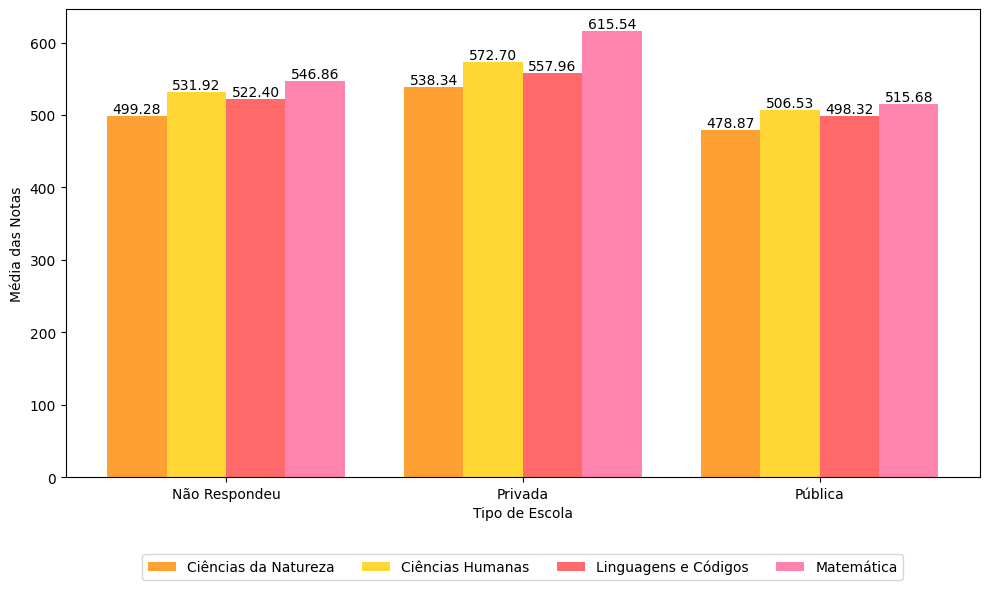

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculando a média das notas por tipo de escola para cada disciplina
media_notas_por_disciplina_escola = df.groupby('TP_ESCOLA')['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT'].mean()

# Convertendo os valores dos tipos de escola para strings
media_notas_por_disciplina_escola.index = media_notas_por_disciplina_escola.index.astype(str)

# Configurando os dados para o gráfico
disciplinas = ['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática']
escolas = media_notas_por_disciplina_escola.index
medias = media_notas_por_disciplina_escola.values

# Aumentando o tamanho da figura
fig, ax = plt.subplots(figsize=(10, 6))

# Criando o gráfico de colunas
bar_width = 0.2
opacity = 0.8
colors = ['#FF8800', '#FFCC00', '#FF4444', '#FF6699']  # Cores para as disciplinas

for i, disciplina in enumerate(disciplinas):
    ax.bar([x + i * bar_width for x in range(len(escolas))], medias[:, i], bar_width, alpha=opacity, color=colors[i], label=disciplina)

# Configurando os rótulos dos eixos x e y
ax.set_xlabel('Tipo de Escola')
ax.set_ylabel('Média das Notas')
ax.set_xticks([x + (bar_width * (len(disciplinas) - 1) / 2) for x in range(len(escolas))])
ax.set_xticklabels(escolas)

# Adicionando os valores das médias nas colunas
for i, disciplina in enumerate(disciplinas):
    for j, media in enumerate(medias[:, i]):
        ax.annotate(f"{media:.2f}", (j + i * bar_width, media), ha='center', va='bottom')

# Posicionando a legenda abaixo do gráfico
ax.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=len(disciplinas))

# Exibindo o gráfico
plt.tight_layout()
plt.show()
